In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/home/iradspm/Msc/Data Analytics/Datasets/android-games.csv")
data.head()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0 M,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,2,PUBG MOBILE - Traverse,37276732,500.0 M,4,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,3,Mobile Legends: Bang Bang,26663595,100.0 M,4,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,4,Brawl Stars,17971552,100.0 M,4,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False


In [3]:
!pip install WordCloud

     |████████████████████████████████| 458 kB 592 kB/s eta 0:00:01


In [4]:
from wordcloud import WordCloud

In [5]:
data.describe()

,rank,total ratings,average rating,growth (30 days),growth (60 days),price,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings
count,1730.000000,1.730000e+03,1730.000000,1730.000000,1730.000000,1730.000000,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03
mean,50.386705,1.064332e+06,3.908092,321.735896,122.554971,0.010942,7.622315e+05,1.164366e+05,5.706307e+04,2.710336e+04,1.014950e+05
std,28.936742,3.429250e+06,0.290973,6018.914507,2253.891703,0.214987,2.538658e+06,3.021631e+05,1.495314e+05,8.154542e+04,4.083745e+05
min,1.000000,3.299300e+04,2.000000,0.000000,0.000000,0.000000,1.397500e+04,2.451000e+03,7.180000e+02,2.660000e+02,5.450000e+02
25%,25.000000,1.759992e+05,4.000000,0.100000,0.200000,0.000000,1.277300e+05,2.064300e+04,9.652500e+03,4.262250e+03,1.281200e+04
50%,50.000000,4.286065e+05,4.000000,0.500000,1.000000,0.000000,2.964340e+05,5.098050e+04,2.507800e+04,1.067550e+04,3.368600e+04
75%,75.000000,8.837970e+05,4.000000,1.700000,3.300000,0.000000,6.198358e+05,1.018140e+05,5.229500e+04,2.322875e+04,8.015725e+04
max,100.000000,8.627313e+07,4.000000,227105.700000,69441.400000,7.490000,6.354677e+07,5.404966e+06,3.158756e+06,2.122183e+06,1.249592e+07


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   int64  
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(3), int64(8), object(3)
memory usage: 191.0+ KB


In [8]:
#select category
cat=data['category']
cat.value_counts()

GAME CARD            126
GAME WORD            104
GAME PUZZLE          100
GAME TRIVIA          100
GAME STRATEGY        100
GAME SPORTS          100
GAME SIMULATION      100
GAME ROLE PLAYING    100
GAME RACING          100
GAME ACTION          100
GAME ADVENTURE       100
GAME EDUCATIONAL     100
GAME CASUAL          100
GAME CASINO          100
GAME BOARD           100
GAME ARCADE          100
GAME MUSIC           100
Name: category, dtype: int64

In [13]:
#filter game-which is common to all categories
text=" ".join(ca.split()[1] for ca in data.category)#filtering the 'GAME' from each row and picking second item
text

'ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE

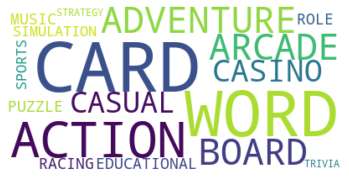

In [17]:
#creating word cloud-ignore collocations in text
word_cloud=WordCloud(collocations=False, background_color ='white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear') #interpolation controls resampling of image-we can also use
#interpolations like gaussian, bicubic, quadric
plt.axis('off') # to remove axis
plt.show()

In [18]:
#word cloud for title column
data.columns

Index(['rank', 'title', 'total ratings', 'installs', 'average rating',
       'growth (30 days)', 'growth (60 days)', 'price', 'category',
       '5 star ratings', '4 star ratings', '3 star ratings', '2 star ratings',
       '1 star ratings', 'paid'],
      dtype='object')

In [19]:
tit=data['title']
tit.head()

0                  Garena Free Fire- World Series
1                          PUBG MOBILE - Traverse
2                       Mobile Legends: Bang Bang
3                                     Brawl Stars
4    Sniper 3D: Fun Free Online FPS Shooting Game
Name: title, dtype: object

In [20]:
tit.value_counts()

Solitaire                                            36
Word Search                                           9
Spider Solitaire                                      7
Bubble Shooter                                        4
Sudoku                                                2
                                                     ..
Stars Slots - Casino Games                            1
Best Casino Free Slots: Casino Slot Machine Games     1
Bingo Journey - Lucky & Fun Casino Bingo Games        1
Slots: Get Rich Free Slots Casino Games Offline       1
Pinturillo 2                                          1
Name: title, Length: 1675, dtype: int64

In [21]:
#join these rows
text_1=" ".join(tit)

In [22]:
text_1

"Garena Free Fire- World Series PUBG MOBILE - Traverse Mobile Legends: Bang Bang Brawl Stars Sniper 3D: Fun Free Online FPS Shooting Game Call of Duty®: Mobile - Season 4: Spurned & Burned Among Us Temple Run 2 PUBG MOBILE LITE Gangstar Vegas: World of Crime Pixel Gun 3D: FPS Shooter & Battle Royale Bowmasters Standoff 2 Talking Tom Gold Run Garena Liên Quân Mobile Banana Kong Crossy Road War Robots. 6v6 Tactical Multiplayer Battles MORTAL KOMBAT: The Ultimate Fighting Game! Last Day on Earth: Survival Agar.io DEER HUNTER CLASSIC Modern Combat 5: eSports FPS Kick the Buddy Special Forces Group 2 DEAD TRIGGER 2 - Zombie Game FPS shooter Mini Militia - Doodle Army 2 Call of Duty®: Mobile - Garena CATS: Crash Arena Turbo Stars Injustice: Gods Among Us Swamp Attack GUNSHIP BATTLE: Helicopter 3D Real Steel World Robot Boxing Critical Ops: Online Multiplayer FPS Shooting Game LINE Rangers - a tower defense RPG w/Brown & Cony! Worms Zone .io - Voracious Snake Six-Guns: Gang Showdown DEAD TARG

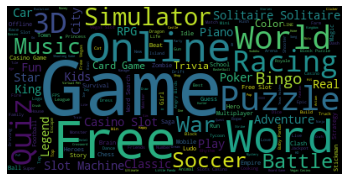

In [26]:
#word_cloud_2=WordCloud(collocations=False, background_color ='white').generate(text_1)
word_cloud_2=WordCloud().generate(text_1)
plt.imshow(word_cloud_2)
plt.axis('off')
plt.show()